# 0. Question & Assumptions
### Is there a relationship between the types of MetroCards swiped at a station and the surrounding neighborhood's demographics (income)?
### Is there a change in the distribution of MetroCard types swiped before and after price hikes?

### Assumptions
- Accounts for only 3 types of MetroCards: Full Fare, 7-D Unlimited, 30-D Unlimited (accounts for over 85% of data)
- Assumes swipes at a station are coming from people who live in the surrounding area. If there were ways to filter the information (e.g. only weekday mornings), this would be more accurate.

### Interactive Map Instructions
To run the script, please install bokeh using either of the following commands:
<br><i>conda install -c bokeh/channel/dev bokeh</i>
<br>or
<br><i>pip install --pre -i https://pypi.anaconda.org/bokeh/channel/dev/simple bokeh --extra-index-url https://pypi.python.org/simple/</i>

Then, you can use the following command to open the interactive map (it will open in a browser tab):
<br><i>bokeh serve --show interactive_map.py</i>

### Summary
- Testing the relationship between income and swipe percentages
- Hypothesis Testing
- Visualization

### Imports

In [1]:
# Downey's Libraries
import thinkplot, thinkstats2, hypothesis

import pandas as pd
import numpy as np
import random, math

%matplotlib inline

## Sample DataFrame
Just to get a sense of the data that was used for this project.

In [2]:
df = pd.read_csv('pricehike1_final.csv')
df.head()

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7D_UNL,30D_UNL,INCOME,FF_PCT,7D_UNL_PCT,30D_UNL_PCT
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,1930648,578586,1134069,123409,0.529917,0.158808,0.311275
R041,BOWLING GREEN & BATTERY PL,45,40.704782,-74.014099,10004,1313498,375262,931003,123409,0.501380,0.143243,0.355377
R002,FULTON ST & BROADWAY NASSAU,ACJZ2345,40.709938,-74.007983,10007,530327,119782,363916,250000,0.522992,0.118125,0.358883
R014,FULTON STREET,2345ACJZ,40.709938,-74.007983,10007,2668771,586067,1834044,250000,0.524432,0.115166,0.360402
R029,PARK PLACE,23ACE,40.712557,-74.009807,10007,4131443,745824,2325399,250000,0.573599,0.103548,0.322853


# 1. Variable Relationships - Income and Card Type (%)
First, I tried doing a simple scatter plot between income and the card type (% of a given station's total swipes).
Initially, extreme values made the plot hard to interpret.

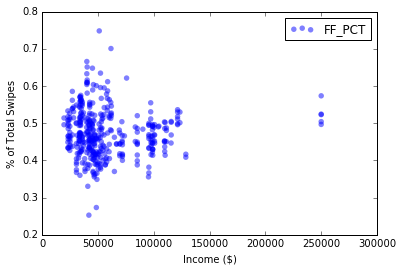

In [3]:
thinkplot.Scatter(df['INCOME'], df['FF_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

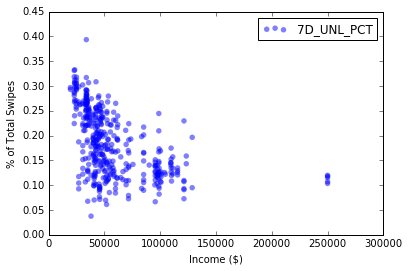

In [4]:
thinkplot.Scatter(df['INCOME'], df['7D_UNL_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

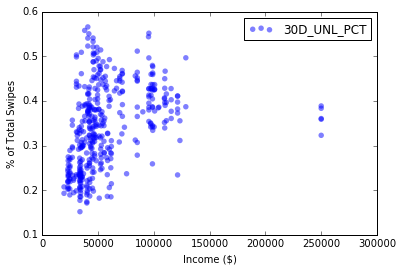

In [5]:
thinkplot.Scatter(df['INCOME'], df['30D_UNL_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

### Zooming In
Filter out the extreme values to see if there is a pattern.

In [6]:
temp = df[df['INCOME'] < 200000]

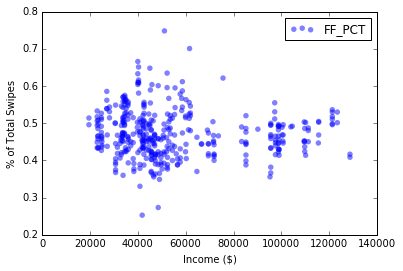

In [7]:
thinkplot.Scatter(temp['INCOME'], temp['FF_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

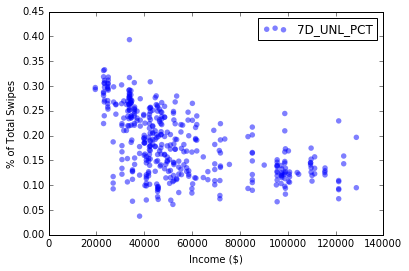

In [8]:
thinkplot.Scatter(temp['INCOME'], temp['7D_UNL_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

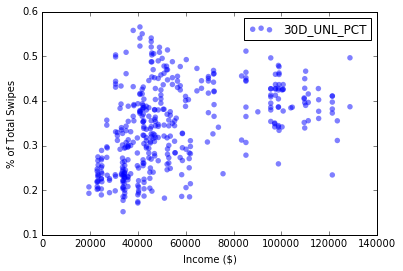

In [9]:
thinkplot.Scatter(temp['INCOME'], temp['30D_UNL_PCT'], alpha=0.5)
thinkplot.Show(xlabel='Income ($)', ylabel='% of Total Swipes')

### Analysis of Scatter Plots
By zooming into the area with the most data, it makes it slightly easier to gauge whether there is relationship between the two variables. From these scatter plots, it would be a stretch to reach any conclusions. By looking at the darker (denser) areas, it seems that there may be a negative linear relationship between 'Income' and '7-D UNL (%)'. However, there is a large group of points just past an income of \$40000 that range between 10% and 25% 7-D UNL swipes which does not follow the linear relationship.<br>

The same goes with the plot for 'Income' and '30-D UNL (%)' - there seems to be a positive linear relationship but there are a wide range of values at \$20000, \$30000, \$40000.

Because the scatter plots failed to yield anything of significance, I tried binning income and plotted percentiles of swipe percentages.

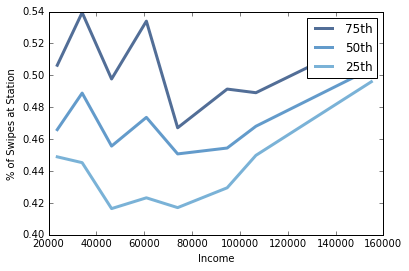

In [10]:
## Code adapted from Chapter 7 of ThinkStats2

bins = np.arange(25000, 125000, 15000)
indices = np.digitize(df['INCOME'], bins)
groups = df.groupby(indices)

incomes = [group['INCOME'].mean() for _, group in groups]
cdfs = [thinkstats2.Cdf(group['FF_PCT']) for _, group in groups]

for percent in [75, 50, 25]:
    swipes = [cdf.Percentile(percent) for cdf in cdfs]
    label = '{:d}th'.format(percent)
    thinkplot.Plot(incomes, swipes, label=label)
thinkplot.Show(xlabel='Income', ylabel='% of Swipes at Station')

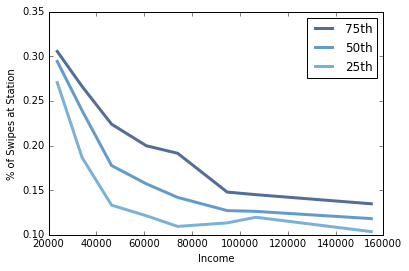

In [11]:
bins = np.arange(25000, 125000, 15000)
indices = np.digitize(df['INCOME'], bins)
groups = df.groupby(indices)

incomes = [group['INCOME'].mean() for _, group in groups]
cdfs = [thinkstats2.Cdf(group['7D_UNL_PCT']) for _, group in groups]

for percent in [75, 50, 25]:
    swipes = [cdf.Percentile(percent) for cdf in cdfs]
    label = '{:d}th'.format(percent)
    thinkplot.Plot(incomes, swipes, label=label)
thinkplot.Show(xlabel='Income', ylabel='% of Swipes at Station')

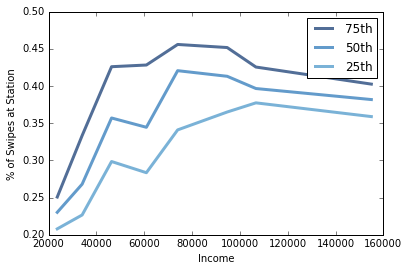

In [12]:
bins = np.arange(25000, 125000, 15000)
indices = np.digitize(df['INCOME'], bins)
groups = df.groupby(indices)

incomes = [group['INCOME'].mean() for _, group in groups]
cdfs = [thinkstats2.Cdf(group['30D_UNL_PCT']) for _, group in groups]

for percent in [75, 50, 25]:
    swipes = [cdf.Percentile(percent) for cdf in cdfs]
    label = '{:d}th'.format(percent)
    thinkplot.Plot(incomes, swipes, label=label)
thinkplot.Show(xlabel='Income', ylabel='% of Swipes at Station')

### Analysis of Binning Income and Plotting Swipe Percentages
The 7-D UNL plot looks like it follows a negative exponential curve but aside from that there are no meaningful patterns we can extract. We could look at small parts of a plot, for example, in the FF (Full Fare) plot, the right third seems to have a positive linear relationship. But this is not very helpful.<br>

To confirm this, let's examine the correlation statistics for the variables that seems to have some sort of relationship - Income & 7-D UNL. First, calculate the Pearson's and Spearman's Correlation.

In [13]:
pearsons = thinkstats2.Corr(df['INCOME'], df['7D_UNL_PCT'])
spearmans = thinkstats2.SpearmanCorr(df['INCOME'], df['7D_UNL_PCT'])
print('Pearsons: {:.2f}, Spearmans: {:.2f}'.format(pearsons, spearmans))

Pearsons: -0.49, Spearmans: -0.59


### Analysis of Pearson's Correlation and Spearman's Rank Correlation
From the textbook (ThinkStats2, p101) - 'if the relationship is nonlinear, Pearson's correlation tends to underestimate the strength of the relationship'. This confirms our observation that there seemed to be a negative exponential relationship between 'Income' and '7-D UNL %'. This is because Pearson's correlation value is -0.49 and Spearman's correlation value is -0.59: by taking the absolute value, Perason's correlation value is lower because it is underestimating the strength of the relationship.

In [14]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.SpearmanCorr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [15]:
ht = CorrelationPermute((df['INCOME'].values, df['7D_UNL_PCT'].values))
ht.PValue()

0.0

### p-value (code from p125 - Section 9.5: Testing a Correlation)
Using example code from p125, we see p < 0.001, meaning that the correlation is highly unlikely to have occured by chance. However, it does not mean that the effect is "important, or significant in practice".

### Estimation
Below are functions to sampling distributions. Code adapted from Chapter 8 of ThinkStats2 (Downey).

In [16]:
## Code adapted from Chapter 8 of ThinkStats2
mean = df['FF_PCT'].mean()
std = df['FF_PCT'].std()

def Estimate(n=100, m=1000):
    mu = mean
    sigma = std
    means, medians = [], []
    estimates1, estimates2 = [], []
    
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        means.append(xbar)
        medians.append(median)
        estimates1.append(biased)
        estimates2.append(unbiased)
    
    print('RMSE xbar: {:.6f}'.format(RMSE(means, mu)))
    print('RMSE median: {:.6f}'.format(RMSE(medians, mu)))
    print('Biased S^2 Error: {:.6f}'.format(MeanError(estimates1, sigma**2)))
    print('Unbiased S^2 Error: {:.6f}'.format(MeanError(estimates2, sigma**2)))
    
def SimulateSample(mu=0, sigma=1, n=100, m=1000):
    
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
        
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stdrerr = RMSE(means, mu)

    print('90% Confidence Interval: {:.4f}, {:.4f}'.format(*ci))
    VertLine(ci[0])
    VertLine(ci[1])
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel='Sample Mean', ylabel='CDF', title='Sampling Distribution')
    
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

### Sampling Distributions
Here, I use the only two variables that most closely resembled a normal distribution to observe the variance of parameters if we were to repeatedly sample from the distribution. Both the estimates for the mean and the median perform well (mean is slightly better) and are within 1% of the actual parameters. Furthermore, the unbiased estimator for the variance is far smaller than the biased estimate as expected. Lastly, the 90% confidence interval was pretty small - just over 2%, meaning that if we ran the experiment again, it would fall in between the range between the two grey lines in the plot below.

RMSE xbar: 0.006058
RMSE median: 0.007858
Biased S^2 Error: -0.000046
Unbiased S^2 Error: -0.000005
90% Confidence Interval: 0.4628, 0.4834


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


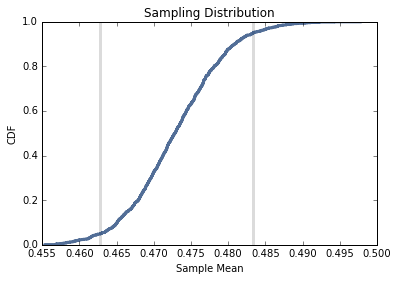

Actual mean: 0.47308924621361725


In [17]:
Estimate()
SimulateSample(mu=mean, sigma=std)
print('Actual mean:', mean)

# 2. Hypothesis Tests

Below are functions that implement the tests. Adapted from Chapter 9 of ThinkStats2 (Downey).

In [18]:
# Test Statistic: Group1 mean - Group2 mean
# i.e. Group1 will have higher mean!
class OneSidedMeanTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        return group1.mean() - group2.mean()
            
    def MakeModel(self):
        group1, group2 = self.data
        self.n = len(group1)
        self.pool = np.hstack((group1, group2))
    
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [19]:
# Test Statistic: Chi-Squared Test
class ChiSquaredTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        stat = self.ChiSquared(group1) + self.ChiSquared(group2)
        return stat
        
    def MakeModel(self):
        group1, group2 = self.data
        self.n = len(group1)
        self.pool = np.hstack((group1, group2))

        binned_data, self.bins = pd.cut(self.pool, 5, retbins=True)
        self.expected_probs = np.array(binned_data.value_counts()) / len(self.pool)
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def ChiSquared(self, data):
        binned_data = pd.cut(data, self.bins)
        observed = np.array(binned_data.value_counts())
        expected = self.expected_probs * len(data)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [20]:
df1 = pd.read_csv('pricehike1_final.csv')
df2 = pd.read_csv('pricehike2_final.csv')

### Datasets & Filters

Below are the datasets and filters that will be used:
* 4 Datasets that correspond to different periods before/after price hikes
<ul>
* pricehike1 - Before Dec 30, 2010 Price Hike
* pricehike2 - Before Mar 3, 2013 Price Hike
* pricehike3 - Before Mar 22, 2015 Price Hike
* pricehike4 - Until today (or next price hike)
</ul>
* Filter for low-income stations
* Filter by borough

<b>Important Note: For all hypothesis tests, test were done on a separate dataset to the one used to find the patterns (including hypothesis tests involving multiple datasets). In addition, the CDFs were all taken from the midterm project.

In [21]:
bottom_quartile = df['INCOME'].quantile(.25)
low_income_mask = df['INCOME'] <= bottom_quartile

df1 = pd.read_csv('pricehike1_final.csv')
df2 = pd.read_csv('pricehike2_final.csv')
df3 = pd.read_csv('pricehike3_final.csv')
df4 = pd.read_csv('pricehike4_final.csv')

bronx_zip_mask = (df['ZIP_CODE'] > 10451) & (df['ZIP_CODE'] <= 10475)

### Hypothesis Test 1 - Mean 7-D UNL %: Low-Income vs Rest
#### CDF of 7-D UNL% by Income
<img src='low_rest_7D.png'>

P-Value of 0.0 (p < 0.001), which shows that the difference in means of 7-D UNL(%) swipes between low income stations and the other stations is statistically significant.

In [22]:
low_rest_7D_mean = OneSidedMeanTest((df.loc[low_income_mask]['7D_UNL_PCT'].values, 
                                     df.loc[~low_income_mask]['7D_UNL_PCT'].values))
low_rest_7D_mean.PValue()

0.0

### Hypothesis Test 2 - Mean 30-D UNL %: Low-Income vs Rest
#### CDF of 30-D UNL% by Income
<img src='low_rest_30D.png'>

Again, P-Value of 0.0 (p < 0.001), which shows that the difference in means of 30-D UNL(%) swipes between low income stations and the other stations is also statistically significant. However, we should also test the difference in distributions by using a Chi-Squared test.

In [23]:
low_rest_30D_mean = OneSidedMeanTest((df.loc[~low_income_mask]['30D_UNL_PCT'].values, 
                                      df.loc[low_income_mask]['30D_UNL_PCT'].values))
low_rest_30D_mean.PValue()

0.0

### Hypothesis Test 3 - Distribution of 7-D UNL%: Low-Income vs Rest

The Chi-Squared test for 7-D UNL% and 30-D UNL% both yielded a result of p < 0.001. Using the results of both hypothesis tests (mean and Chi-squared), we can say that there is a difference between the low-income stations and the rest of stations - the mean usage of 7-D UNL% is more and 30-D UNL% is less in low-income stations.

In [24]:
low_rest_7D_dist = ChiSquaredTest((df.loc[~low_income_mask]['7D_UNL_PCT'].values,
                                   df.loc[low_income_mask]['7D_UNL_PCT'].values))
low_rest_7D_dist.PValue()

0.0

### Hypothesis Test 4 - Distribution of 30-D UNL%: Low-Income vs Rest

Same comment as above.

In [25]:
low_rest_30D_dist = ChiSquaredTest((df.loc[~low_income_mask]['30D_UNL_PCT'].values, 
                                   df.loc[low_income_mask]['30D_UNL_PCT'].values))
low_rest_30D_dist.PValue()

0.0

### Hypothesis Test 5/6 - Mean & Distribution of FF%: Low-Income vs Rest
#### CDF of 30-D UNL% by Income
<img src='low_rest_FF.png'>

For comparison, the difference of FF% between low-income and the rest of stations is borderline significant, depending on the p-value.

In [26]:
low_rest_FF_mean = OneSidedMeanTest((df.loc[low_income_mask]['FF_PCT'].values, 
                                      df.loc[~low_income_mask]['FF_PCT'].values))
low_rest_FF_mean.PValue()

0.003

In [27]:
low_rest_FF_dist = ChiSquaredTest((df.loc[~low_income_mask]['FF_PCT'].values, 
                                   df.loc[low_income_mask]['FF_PCT'].values))
low_rest_FF_dist.PValue()

0.034

### Hypothesis Test 7/8 - Mean & Distribution of 7-D UNL%: Before & After a Price Hike of Dec 30, 2010
#### CDF of 7-D UNL% by Periods Before & After Price Hikes
<img src='price_hike_7D.png'>

Out of the 3 price hikes, it seems that the difference in distributions before and after this particular price hike is the smallest (left 2 lines). Even so, from the one-sided mean test and chi-squared test, the difference before and after the first price hike is statistically significant.

In [28]:
df1_df2_7D_mean = OneSidedMeanTest((df2['7D_UNL_PCT'].values, 
                                     df1['7D_UNL_PCT'].values))
df1_df2_7D_mean.PValue()

0.0

In [29]:
df1_df2_7D_dist = ChiSquaredTest((df2['7D_UNL_PCT'].values, 
                                  df1['7D_UNL_PCT'].values))
df1_df2_7D_dist.PValue()

0.002

### Hypothesis Test 9~12 - Mean & Distribution of 7-D UNL%: Before & After Price Hike of <br>Mar 3, 2013 & Mar 22, 2015
Similarly, all the other periods before and after a price hike show a difference that is statistically significant.

In [30]:
df2_df3_7D_mean = OneSidedMeanTest((df3['7D_UNL_PCT'].values, 
                                    df2['7D_UNL_PCT'].values))
df2_df3_7D_mean.PValue()

0.0

In [31]:
df2_df3_7D_dist = ChiSquaredTest((df3['7D_UNL_PCT'].values, 
                                  df2['7D_UNL_PCT'].values))
df2_df3_7D_dist.PValue()

0.0

In [32]:
df3_df4_7D_mean = OneSidedMeanTest((df4['7D_UNL_PCT'].values, 
                                    df3['7D_UNL_PCT'].values))
df3_df4_7D_mean.PValue()

0.0

In [33]:
df3_df4_7D_dist = ChiSquaredTest((df4['7D_UNL_PCT'].values, 
                                  df3['7D_UNL_PCT'].values))
df3_df4_7D_dist.PValue()

0.0

### Hypothesis Test 13~18 - Mean & Distribution of 30-D UNL%: All Price Hikes
#### CDF of 30-D UNL% by Periods Before & After Price Hikes
<img src='price_hike_30D.png'>

Same tests as above except with 30D UNL%. However, none of the distributions except the period before and after the first price hike show a statistically significant difference. The one-sided mean test for the periods before and after the first price hike seem to indicate that there is a difference between the distributions with p < 0.001. Going further, the chi-squared test shows p = 0.007, which is low enough to be significant.

For the other price periods, the p value increases with the date. This correlates to the CDF, where the gap between the distributions decreases.

In [34]:
df1_df2_30D_mean = OneSidedMeanTest((df1['30D_UNL_PCT'].values, 
                                     df2['30D_UNL_PCT'].values))
df1_df2_30D_mean.PValue()

0.0

In [35]:
df1_df2_30D_dist = ChiSquaredTest((df1['30D_UNL_PCT'].values, 
                                  df2['30D_UNL_PCT'].values))
df1_df2_30D_dist.PValue()

0.01

In [36]:
df2_df3_30D_mean = OneSidedMeanTest((df2['30D_UNL_PCT'].values, 
                                     df3['30D_UNL_PCT'].values))
df2_df3_30D_mean.PValue()

0.015

In [37]:
df2_df3_30D_dist = ChiSquaredTest((df2['30D_UNL_PCT'].values, 
                                  df3['30D_UNL_PCT'].values))
df2_df3_30D_dist.PValue()

0.442

In [38]:
df3_df4_30D_mean = OneSidedMeanTest((df3['30D_UNL_PCT'].values, 
                                     df4['30D_UNL_PCT'].values))
df3_df4_30D_mean.PValue()

0.187

In [39]:
df3_df4_30D_dist = ChiSquaredTest((df3['30D_UNL_PCT'].values, 
                                  df4['30D_UNL_PCT'].values))
df3_df4_30D_dist.PValue()

0.745

### Analysis
From these hypothesis tests, we can say that the following are statistically significant:
- Difference in distributions of 7-Day Unlimited card swipe percentage between low-income stations & the rest
- Difference in distributions of 30-Day Unlimited card swipe percentage between low-income stations & the rest
- Usage (% of total swipes) of 7-Day Unlimited cards before and after each price hike

### Hypothesis Test 19~22 - Mean & Distribution of 7-D UNL% & 30-D UNL%: Bronx vs Rest
#### CDF of 7-D UNL% by Borough
<img src='bronx_rest_7D.png'>
<img src='bronx_rest_30D.png'>

Here, we test the difference between distributions of stations in the Bronx vs the rest of the boroughs (except Staten Island) for 7-D UNL% and 30-D UNL%. Both produce a statistically significant result: Stations in the Bronx have a higher amount of 7-D UNL swipes and lower amount of 30-D UNL swipes compared to other boroughs.

In [40]:
bronx_rest_7D_mean = OneSidedMeanTest((df.loc[bronx_zip_mask]['7D_UNL_PCT'].values,
                                       df.loc[~bronx_zip_mask]['7D_UNL_PCT'].values))
bronx_rest_7D_mean.PValue()

0.0

In [41]:
bronx_rest_7D_dist = ChiSquaredTest((df.loc[bronx_zip_mask]['7D_UNL_PCT'].values,
                                     df.loc[~bronx_zip_mask]['7D_UNL_PCT'].values))
bronx_rest_7D_dist.PValue()

0.0

In [42]:
bronx_rest_30D_mean = OneSidedMeanTest((df.loc[~bronx_zip_mask]['30D_UNL_PCT'].values,
                                       df.loc[bronx_zip_mask]['30D_UNL_PCT'].values))
bronx_rest_30D_mean.PValue()

0.0

In [43]:
bronx_rest_30D_dist = ChiSquaredTest((df.loc[~bronx_zip_mask]['30D_UNL_PCT'].values,
                                     df.loc[bronx_zip_mask]['30D_UNL_PCT'].values))
bronx_rest_30D_dist.PValue()

0.0

# 3. Visualization
To view the interactive map, follow instructions on running the script at the top of the notebook.

# Conclusion & Future Work

It is fascinating to see all of these findings on the interactive map. Some findings are made even clearer by the map. For example, you can see the differences beween boroughs very well. There are also additional patterns that you can see through the filter by subway line dropdown. For example, if you filter by the L train and look at 30-Day Unlimited usage, you can see the dots getting lighter as you go further into Brooklyn, meaning people use that card less the further out you go. In contrast, if you look at 7-Day Unlimited usage, you see the opposite pattern - the dots get darker the further you go into Brooklyn, meaning people use it more. Making an educated guess, it might be reasonable to suspect that income may be a factor in this (lower income the further out you go). However, there could be other variables/factors that we have not accounted for, especially since I have made several assumptions.

To do in the near future:
- Deploy interactive map.
- Similar work with a different dataset from the MTA.